In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\winequality-red.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [5]:
data1 = pd.read_csv(path,encoding = 'ascii')
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data1.shape

(1599, 12)

In [7]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Quality is the label

<AxesSubplot:>

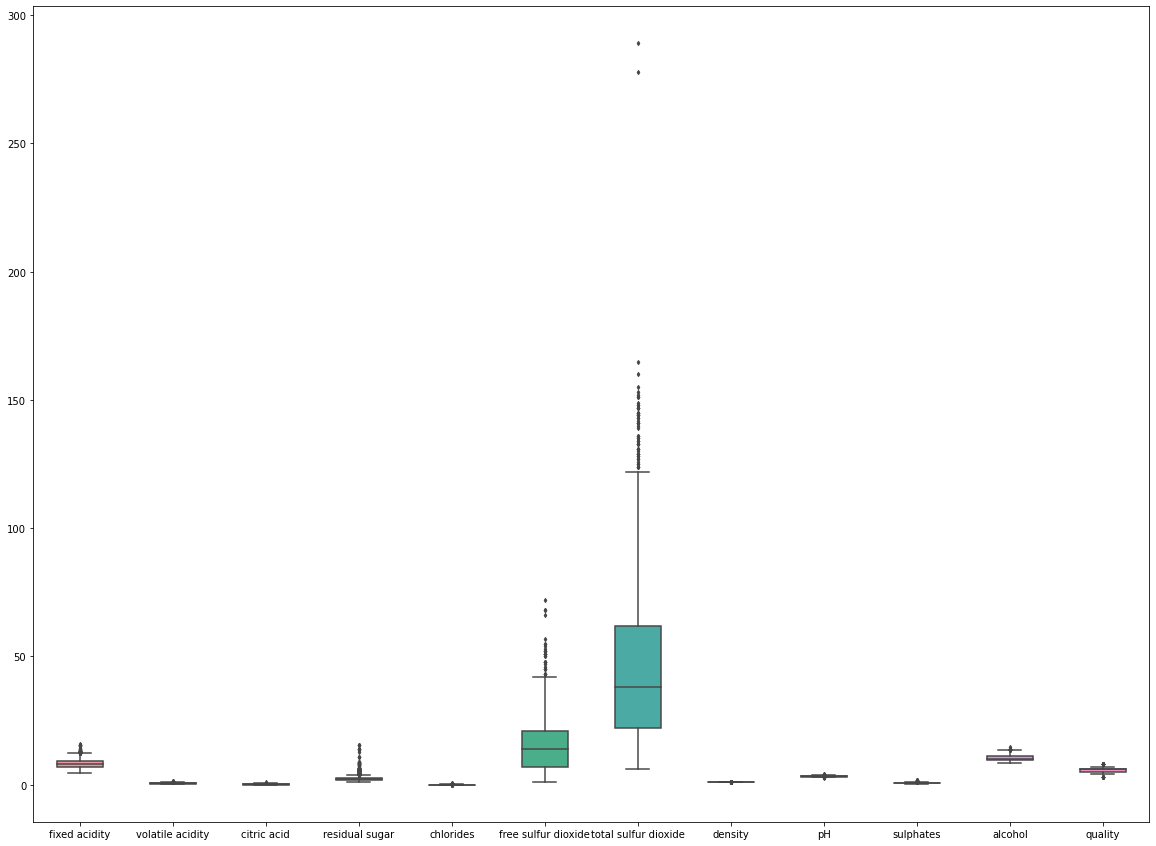

In [13]:
fig,ax=plt.subplots(figsize=(20,15))
sns.boxplot(data=data1,width = 0.5,ax=ax,fliersize=3)

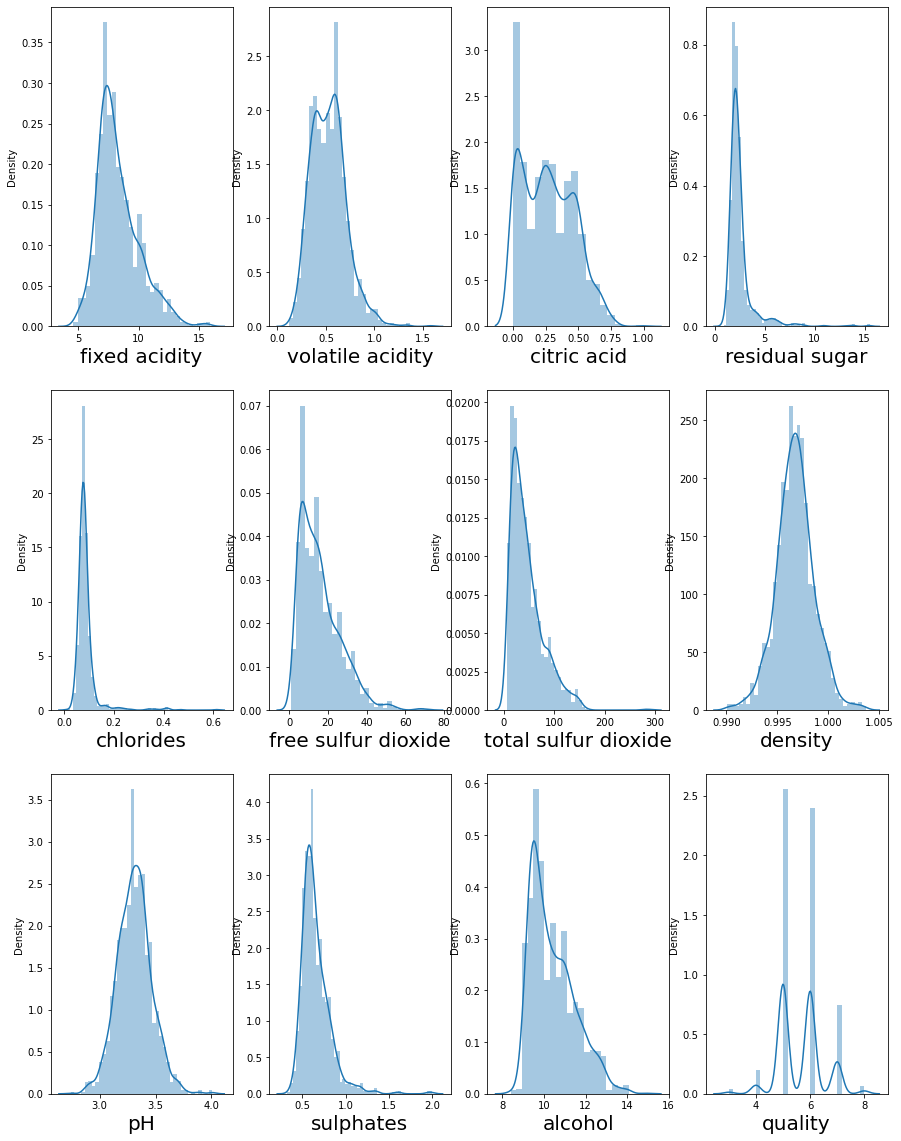

In [14]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

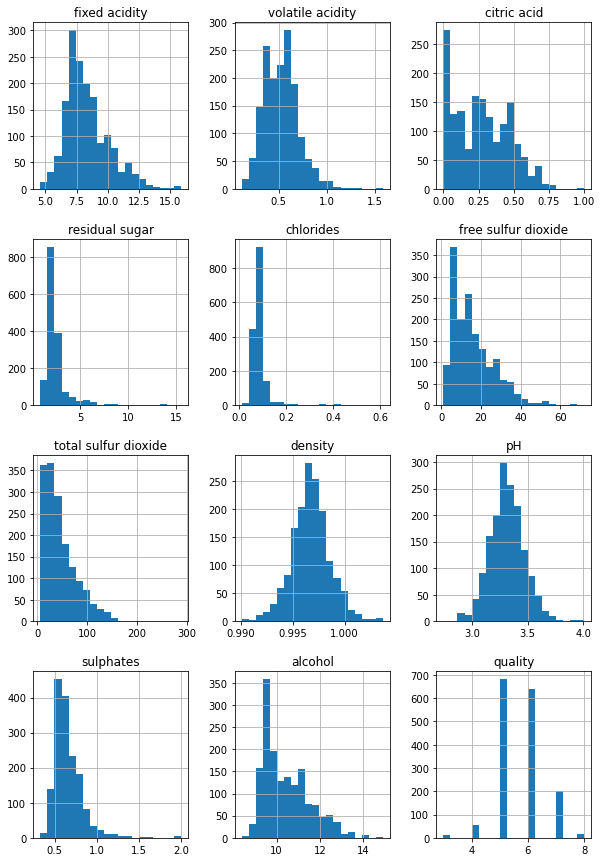

In [15]:
data1.hist(figsize=(10,15) , bins = 20)
plt.show()

Text(0, 0.5, 'alcohol')

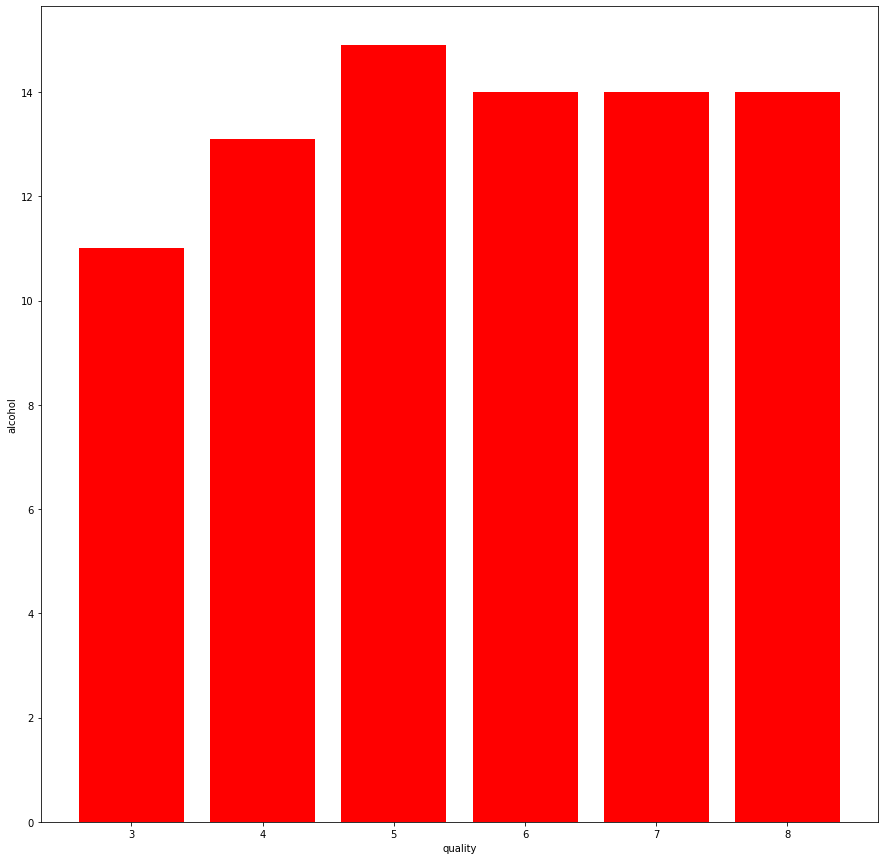

In [16]:
plt.figure(figsize=(15,15),facecolor='white')
plt.bar(data1['quality'],data1['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

# Checking multicolleanirity

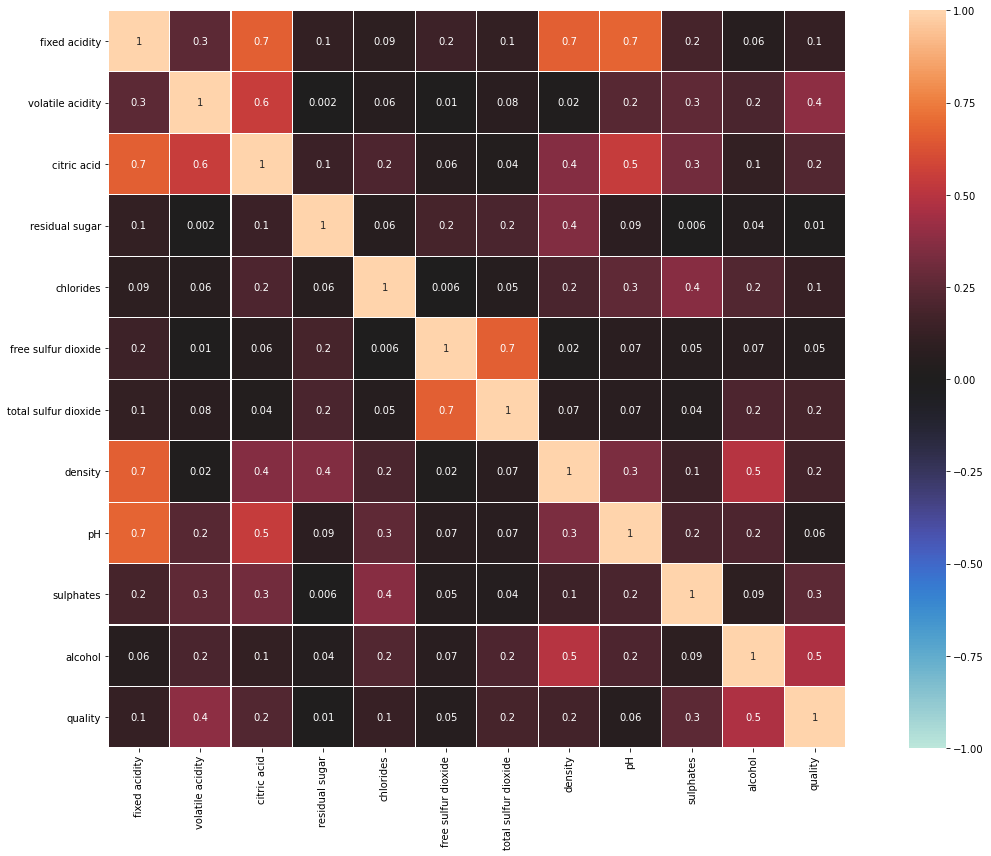

In [17]:
data_corr = data1.corr().abs()

plt.figure(figsize = (18,12))
sns.heatmap(data_corr , vmin=-1 , vmax=1 , annot=True,
            square=True , center=0 , fmt = '.1g' , linewidths=.1)
plt.tight_layout()

In [18]:
data1['goodquality'] = [1 if x >= 7 else 0 for x in data1['quality']]

#separate the feature and Label :
x = data1.drop(['quality','goodquality'],axis=1)
y = data1['goodquality']


In [19]:
data1['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=415)

# Random forrest

In [24]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf1=RandomForestClassifier()

params = {'n_estimators' : [10,12],
         'criterion' : ['entropy'],
         'max_depth': [8,13],
         'min_samples_split' : [8,9],
         'min_samples_leaf' : [5,6]
         }
grd1= GridSearchCV(clf1,param_grid=params)
grd1.fit(x_train,y_train)
print('best_params =>',grd1.best_params_)

clf1=grd1.best_estimator_ 

clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print('conf_mat = >','\n',rf_conf_mat)
print('Accuracy rf Normal -',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 12}
conf_mat = > 
 [[319  14]
 [ 47  20]]
Accuracy rf Normal - 0.8475


In [25]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       333
           1       0.59      0.30      0.40        67

    accuracy                           0.85       400
   macro avg       0.73      0.63      0.65       400
weighted avg       0.82      0.85      0.83       400



# Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5)
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       333
           1       0.57      0.60      0.58        67

    accuracy                           0.86       400
   macro avg       0.74      0.75      0.75       400
weighted avg       0.86      0.86      0.86       400



# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.815

In [28]:
from sklearn.ensemble import BaggingClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),
                           n_estimators = 8, max_samples = 0.5,
                           bootstrap=True, random_state=5, oob_score=True)

In [29]:
bag_knn.oob_score

True

In [30]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.845

### Using Bagging itself the data and score looks better.

# ROC Curve

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [33]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()

In [34]:
lr.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
roc_auc_score(y_test,rfc.predict(x_test))

0.7416745103312267

In [36]:
roc_auc_score(y_test,lr.predict(x_test))

0.5820447312984627

In [37]:
roc_auc_score(y_test,knc.predict(x_test))

0.6103043341849311

In [38]:
roc_auc_score(y_test,dtc.predict(x_test))

0.7475012325758595

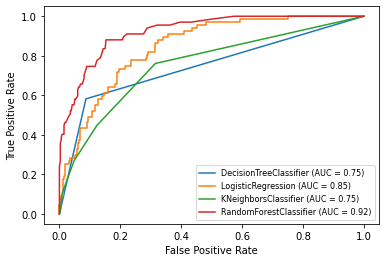

In [40]:
disp = plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)   
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()